# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import joblib
from math import exp
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.inspection import PartialDependenceDisplay

from treeinterpreter import treeinterpreter as ti

import shap


In [3]:
pd.set_option('display.max_columns', 100)

import sys

sys.path.append(r'D:\Usuarios\Kitty\Documentos\1-Master\TFM')

sys.path.append(r'D:\Programas\GitHub\TFM')

In [4]:
import os
os.chdir(r'D:\Programas\GitHub\TFM')

# Parameters

In [5]:
target = "Default"

# Load Data

In [6]:
df = pd.read_csv("data/Credit_Card_Preprocessing.csv")

In [7]:
df

,CreditLimit,Age,BillAmountSep,BillAmountAug,BillAmountJul,BillAmountJun,BillAmountMay,BillAmountApr,PreviousPaymentSep,PreviousPaymentAug,PreviousPaymentJul,PreviousPaymentJun,PreviousPaymentMay,PreviousPaymentApr,Default,Gender_Female,Gender_Male,EducationLevel_Graduate School,EducationLevel_High School,EducationLevel_Others,EducationLevel_University,EducationLevel_Unknown,Marriage_Married,Marriage_Others,Marriage_Single,Marriage_Unknown,RepaymentStatusSep_Delay 1 Month,RepaymentStatusSep_Delay 2 Months,RepaymentStatusSep_Delay 2+ Months,RepaymentStatusSep_No Consumption,RepaymentStatusSep_Paid Duly,RepaymentStatusAug_Delay 1 Month,RepaymentStatusAug_Delay 2 Months,RepaymentStatusAug_Delay 2+ Months,RepaymentStatusAug_No Consumption,RepaymentStatusAug_Paid Duly,RepaymentStatusJul_Delay 1 Month,RepaymentStatusJul_Delay 2 Months,RepaymentStatusJul_Delay 2+ Months,RepaymentStatusJul_No Consumption,RepaymentStatusJul_Paid Duly,RepaymentStatusJun_Delay 1 Month,RepaymentStatusJun_Delay 2 Months,RepaymentStatusJun_Delay 2+ Months,RepaymentStatusJun_No Consumption,RepaymentStatusJun_Paid Duly,RepaymentStatusMay_Delay 2 Months,RepaymentStatusMay_Delay 2+ Months,RepaymentStatusMay_No Consumption,RepaymentStatusMay_Paid Duly,RepaymentStatusApr_Delay 2 Months,RepaymentStatusApr_Delay 2+ Months,RepaymentStatusApr_No Consumption,RepaymentStatusApr_Paid Duly
0,0.019608,0.076923,0.108224,0.323497,0.299135,0.329258,0.333178,0.320342,0.000000,0.061250,0.000000,0.000000,0.000000,0.000000,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.215686,0.128205,0.101293,0.317385,0.308721,0.345789,0.351934,0.338650,0.000000,0.088897,0.093694,0.104341,0.000000,0.203728,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.156863,0.333333,0.250822,0.371991,0.361035,0.401665,0.414328,0.407636,0.137837,0.133345,0.093694,0.104341,0.103093,0.509321,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.078431,0.410256,0.350769,0.523825,0.532893,0.472315,0.490391,0.486223,0.181604,0.179483,0.112433,0.114775,0.110206,0.101864,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.078431,0.923077,0.134710,0.334896,0.468175,0.435057,0.437118,0.427746,0.181604,0.178594,0.936944,0.939065,0.071031,0.069166,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.411765,0.461538,0.212211,0.403831,0.392440,0.773900,0.502758,0.410056,0.771815,0.178594,0.468753,0.317926,0.515464,0.101864,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
29996,0.274510,0.564103,0.095668,0.317842,0.312665,0.374624,0.361353,0.320342,0.166803,0.313450,0.843062,0.013460,0.000000,0.000000,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
29997,0.039216,0.410256,0.106264,0.324624,0.309086,0.434744,0.444914,0.429015,0.000000,0.000000,0.168650,0.438230,0.206186,0.315779,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
29998,0.137255,0.512821,0.076930,0.657638,0.662816,0.595899,0.397536,0.595120,0.190684,0.303049,0.110372,0.20096

In [8]:
X_scaled = df[[elem for elem in df.columns if elem != target]].values
y = pd.Series(df[target], name=target)

feature_names = [col for col in df.columns if col != target]

In [9]:
print(X_scaled[-1])
print("\n",X_scaled.shape)

[0.07843137 0.64102564 0.35605617 0.52680827 0.53516805 0.51385149
 0.50922357 0.4063114  0.1886861  0.16001422 0.13398295 0.10434057
 0.10309278 0.10186411 0.         1.         0.         0.
 0.         1.         0.         1.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.         1.         0.         0.
 0.         0.         1.         0.         0.         0.
 0.         1.         0.         0.         0.         1.
 0.         0.         0.         1.         0.        ]

 (30000, 53)


# Hiperparámetros

In [10]:
from Modelling import ModelSelectionPipeline

In [ ]:
pipeline = ModelSelectionPipeline(
    test_size=0.2, 
    random_state=42,
    models=None,
    param_grids=None
)

Estimadores seleccionados : ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'K-Nearest Neighbors', 'Random Forest', 'Gradient Boosting']


In [12]:
pipeline.models

{'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
 'Decision Tree': DecisionTreeClassifier(random_state=42),
 'Naive Bayes': GaussianNB(),
 'K-Nearest Neighbors': KNeighborsClassifier(),
 'Random Forest': RandomForestClassifier(random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(random_state=42)}

In [13]:
model_names = list(pipeline.models.keys())

In [ ]:
pipeline.param_grids

{'Logistic Regression': {'C': [0.1, 1, 10],
  'solver': ['lbfgs', 'liblinear'],
  'penalty': ['l2']},
 'Decision Tree': {'criterion': ['gini', 'entropy'],
  'max_depth': [3, 4],
  'min_samples_split': [50, 500]},
 'Naive Bayes': {'var_smoothing': array([1.00000000e+00, 5.62341325e-03, 3.16227766e-05, 1.77827941e-07,
         1.00000000e-09])},
 'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7],
  'weights': ['uniform', 'distance'],
  'metric': ['euclidean', 'manhattan']},
 'Random Forest': {'n_estimators': [50, 100],
  'max_depth': [3, 5],
  'min_samples_split': [50, 500]},
 'Gradient Boosting': {'n_estimators': [50, 100],
  'learning_rate': [0.01, 0.1],
  'max_depth': [3, 5]}}

In [16]:
X_train, y_train, X_train_smote, y_train_smote, X_val, y_val = pipeline.run(X_scaled, y)

División en train y test ...
Balanceando el dataset en train ...
Búsqueda de hiperparámetros ...
** Logistic Regression **
** Decision Tree **
** Naive Bayes **
** K-Nearest Neighbors **
** Random Forest **
** Gradient Boosting **
Tiempo total (min): 8.54
Evaluando mejor modelo ...
** Logistic Regression **
** Decision Tree **
** Naive Bayes **
** K-Nearest Neighbors **
** Random Forest **
** Gradient Boosting **
Tiempo total (min): 28.95
Guardando resultados ...


In [ ]:
# Si ya hemos ejecutado una vez podemos ejecutar simplemente esto para obtener los dataframes

# Paso 1 : Dividir la muestra en train y test
X_train, X_val, y_train, y_val = pipeline._split_data(X_scaled, y)

# Paso 2 : Balancear el dataset
X_train_smote, y_train_smote = pipeline._apply_smote(X_train=X_train, y_train=y_train)

División en train y test ...
Balanceando el dataset en train ...


In [16]:
pipeline.best_models

{'Logistic Regression': LogisticRegression(C=0.1, max_iter=1000, random_state=42, solver='liblinear'),
 'Decision Tree': DecisionTreeClassifier(max_depth=4, min_samples_split=50, random_state=42),
 'Naive Bayes': GaussianNB(var_smoothing=3.1622776601683795e-05),
 'K-Nearest Neighbors': KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance'),
 'Random Forest': RandomForestClassifier(max_depth=5, min_samples_split=50, random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(max_depth=5, random_state=42)}

In [ ]:
pipeline.grid_results_df

,Best Params,Best Accuracy,Execution Time (s)
Model,,,
Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.837489,336.355111
K-Nearest Neighbors,"{'metric': 'manhattan', 'n_neighbors': 3, 'wei...",0.830908,87.762972
Random Forest,"{'max_depth': 5, 'min_samples_split': 50, 'n_e...",0.726124,46.424057
Logistic Regression,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.708603,26.887334
Naive Bayes,{'var_smoothing': 3.1622776601683795e-05},0.694264,5.491035
Decision Tree,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.691616,9.582602


In [ ]:
pipeline.evaluation_df

,Mean Accuracy,Mean Precision,Mean Recall,Mean F1-Score,Mean ROC-AUC,Execution Time (s)
Model,,,,,,
Gradient Boosting,0.837489,0.840906,0.837489,0.837080,0.907686,1477.793011
K-Nearest Neighbors,0.830988,0.849635,0.830988,0.828698,0.902047,75.286544
Random Forest,0.726124,0.737461,0.726124,0.722819,0.798277,152.564604
Logistic Regression,0.708603,0.720019,0.708603,0.704775,0.777219,14.081316
Naive Bayes,0.694264,0.719754,0.694264,0.685134,0.763673,3.724028
Decision Tree,0.691616,0.729007,0.691616,0.678536,0.755418,13.412322


# Regresión Logística

In [19]:
model_names[0]

'Logistic Regression'

In [ ]:
# Extraer el modelo de Regresión Logística
logistic_model = pipeline.best_models[model_names[0]]

# Obtener los coeficientes y el intercepto
coefficients = logistic_model.coef_[0]
intercept = logistic_model.intercept_[0]

# Crear un DataFrame para los coeficientes
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Absolute Coefficient": np.abs(coefficients)
})

# Ordenar los coeficientes por valor absoluto en orden descendente
coef_df_sorted = coef_df.sort_values(by="Coefficient", ascending=False)

# Generar la ecuación de la regresión logística ordenada
sorted_features = coef_df_sorted["Feature"]
sorted_coefficients = coef_df_sorted["Coefficient"]

# Crear la ecuación ordenada
equation = " + ".join(
    [f"{coef:.4f}*{feature}" for coef, feature in zip(sorted_coefficients, sorted_features)]
)
equation = f"logit(p) = {intercept:.4f} + {equation}"

# Mostrar la ecuación
print("Ecuación de la Regresión Logística (ordenada por relevancia):")
print(equation)

# Mostrar los coeficientes ordenados
print("\nCoeficientes de la Regresión Logística ordenados por relevancia:")
print(coef_df_sorted.head(20))


Ecuación de la Regresión Logística (ordenada por relevancia):
logit(p) = 0.2445 + 1.2171*RepaymentStatusSep_Delay 2 Months + 0.7396*RepaymentStatusSep_Delay 2+ Months + 0.4713*EducationLevel_University + 0.4599*EducationLevel_Graduate School + 0.4169*Marriage_Married + 0.3848*RepaymentStatusJul_Delay 2 Months + 0.3482*RepaymentStatusMay_Delay 2 Months + 0.3130*EducationLevel_High School + 0.3060*RepaymentStatusApr_Delay 2+ Months + 0.2865*RepaymentStatusAug_Delay 2 Months + 0.2840*RepaymentStatusJun_Delay 2 Months + 0.2488*Marriage_Single + 0.2319*BillAmountApr + 0.1970*BillAmountJun + 0.1919*Gender_Male + 0.1914*RepaymentStatusApr_Delay 2 Months + 0.1664*Marriage_Others + 0.1565*RepaymentStatusAug_No Consumption + 0.1411*RepaymentStatusAug_Delay 2+ Months + 0.0920*Age + 0.0668*RepaymentStatusMay_Paid Duly + 0.0526*Gender_Female + 0.0510*RepaymentStatusJul_Delay 2+ Months + 0.0443*RepaymentStatusJun_Delay 1 Month + 0.0225*RepaymentStatusJun_No Consumption + 0.0130*RepaymentStatusMay_No

In [21]:
exp(0.7396)

print("f_0",((1-0.3)**2)/(2*(0.3**2)))
print("f_1",((1-0.7)**2)/(2*(0.3**2)))
print(0.298-0.03)

f_0 2.722222222222222
f_1 0.5000000000000001
0.268


# Árbol de Decisión

In [22]:
model_names[1]

'Decision Tree'

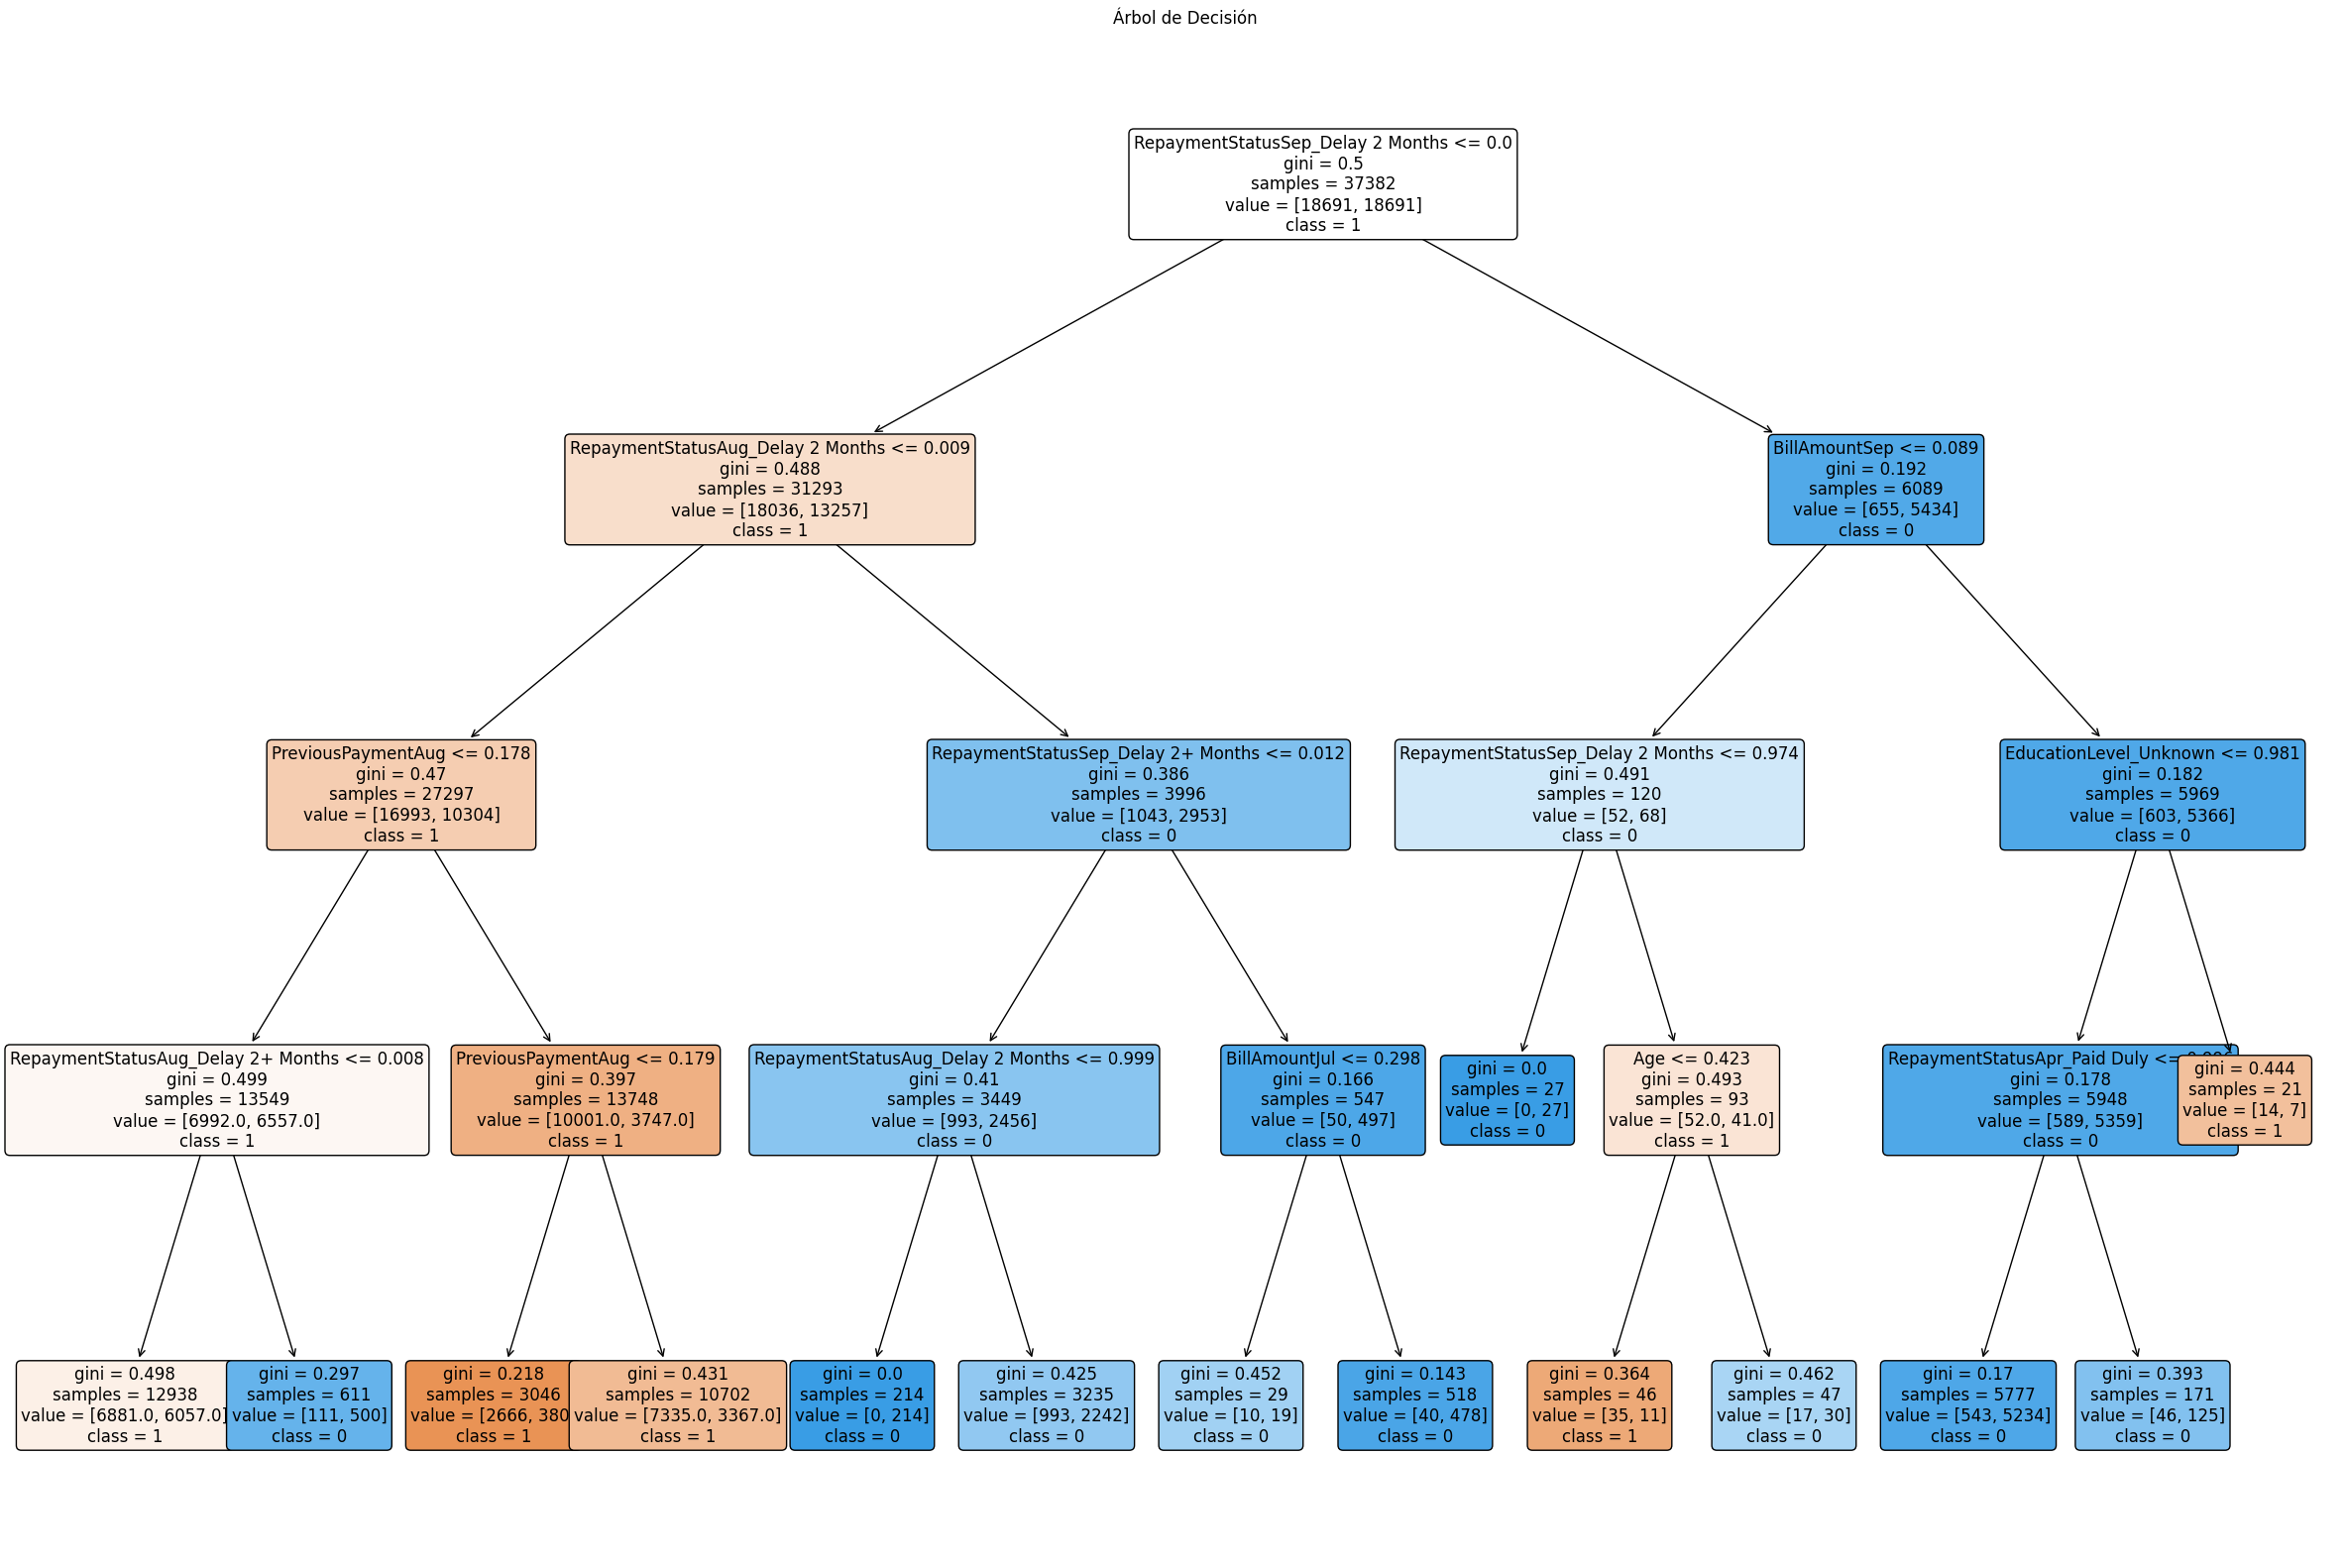

In [ ]:
# Árbol de Decisión
decision_tree_model = pipeline.best_models[model_names[1]]

# Crear la gráfica
plt.figure(figsize=(30, 20))
plot_tree(
    decision_tree_model,
    feature_names=feature_names,  # Nombres de las características (si es un DataFrame)
    class_names=[str(cls) for cls in y.unique()],  # Nombres de las clases
    filled=True,  # Colorear nodos según la clase predominante
    rounded=True,  # Bordes redondeados
    fontsize=12  # Tamaño de la fuente
)
plt.title("Árbol de Decisión")
plt.show()

In [24]:
decision_tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 50,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [25]:
decision_tree_model.feature_importances_

array([0.        , 0.00175395, 0.00615121, 0.        , 0.00093126,
       0.        , 0.        , 0.        , 0.        , 0.18487283,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00319279, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.53351422, 0.00863221, 0.        , 0.        ,
       0.        , 0.22466578, 0.03387696, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00240879])

In [26]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': decision_tree_model.feature_importances_
})

# Ordenar por importancia
importance_df.sort_values(by='Importance', ascending=False).head(11)

,Feature,Importance
26,RepaymentStatusSep_Delay 2 Months,0.533514
31,RepaymentStatusAug_Delay 2 Months,0.224666
9,PreviousPaymentAug,0.184873
32,RepaymentStatusAug_Delay 2+ Months,0.033877
27,RepaymentStatusSep_Delay 2+ Months,0.008632
2,BillAmountSep,0.006151
20,EducationLevel_Unknown,0.003193
52,RepaymentStatusApr_Paid Duly,0.002409
1,Age,0.001754
4,BillAmountJul,0.000931


# Naive Bayes

In [27]:
model_names[2]

'Naive Bayes'

In [ ]:
# Extraer el modelo Naive Bayes
nb_model = pipeline.best_models[model_names[2]]

# Calcular probabilidades para el conjunto de prueba
class_probabilities = nb_model.predict_proba(X_val)
predictions = nb_model.predict(X_val)

# Crear un DataFrame con las probabilidades y las predicciones
prob_df = pd.DataFrame(class_probabilities, columns=[f"P(Class {cls})" for cls in nb_model.classes_])
prob_df["Prediction"] = predictions
prob_df["Actual"] = y_val.values

print("Probabilidades calculadas por Naive Bayes para las primeras observaciones:")
print(prob_df.head(20))


Probabilidades calculadas por Naive Bayes para las primeras observaciones:
      P(Class 0)    P(Class 1)  Prediction  Actual
0   9.990553e-01  9.446878e-04           0       0
1   9.975624e-01  2.437594e-03           0       0
2   9.973593e-01  2.640706e-03           0       0
3   1.000000e+00  2.381061e-08           0       1
4   1.000000e+00  3.792621e-08           0       0
5   1.574052e-01  8.425948e-01           1       0
6   9.999929e-01  7.127040e-06           0       0
7   1.000000e+00  1.797002e-08           0       0
8   9.999993e-01  7.340517e-07           0       0
9   9.953431e-01  4.656939e-03           0       0
10  3.465720e-02  9.653428e-01           1       0
11  9.978473e-01  2.152652e-03           0       0
12  9.971730e-01  2.827035e-03           0       1
13  1.000000e+00  8.414005e-09           0       0
14  9.994628e-01  5.371659e-04           0       0
15  1.398339e-14  1.000000e+00           1       0
16  9.999996e-01  3.500148e-07           0       0
17  9.9

c:\Users\kitt_.DESKTOP-FP2KS5Q.000\.conda\envs\unir\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\Users\kitt_.DESKTOP-FP2KS5Q.000\.conda\envs\unir\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


### Medias y varianzas para la clase 0

In [29]:
# Extraer las estadísticas de la clase 0
if isinstance(nb_model, GaussianNB):
    class_label = 0  # Cambia esto si la etiqueta de tu clase es diferente
    class_index = list(nb_model.classes_).index(class_label)  # Índice de la clase 1
    
    # Medias y varianzas de la clase 1
    means_class_0 = nb_model.theta_[class_index]
    variances_class_0 = nb_model.var_[class_index]
    
    # Crear un DataFrame con las estadísticas para la clase 10
    stats_class_0_df = pd.DataFrame({
        "Feature": feature_names,
        "Mean": means_class_0,
        "Variance": variances_class_0
    })
    
    print(f"Medias y varianzas para la clase {class_label}:")
    print(stats_class_0_df)
else:
    print("El modelo no es de tipo GaussianNB.")


Medias y varianzas para la clase 0:
                               Feature      Mean  Variance
0                          CreditLimit  0.324338  0.061510
1                                  Age  0.361973  0.049099
2                        BillAmountSep  0.275552  0.046547
3                        BillAmountAug  0.452431  0.027049
4                        BillAmountJul  0.440302  0.028004
5                        BillAmountJun  0.464540  0.024642
6                        BillAmountMay  0.464988  0.023954
7                        BillAmountApr  0.450372  0.024848
8                   PreviousPaymentSep  0.259853  0.056172
9                   PreviousPaymentAug  0.242679  0.052087
10                  PreviousPaymentJul  0.224813  0.052461
11                  PreviousPaymentJun  0.209483  0.047363
12                  PreviousPaymentMay  0.207817  0.046738
13                  PreviousPaymentApr  0.201826  0.045583
14                       Gender_Female  0.616179  0.236510
15                  

### Medias y varianzas para la clase 1

In [30]:
# Extraer las estadísticas de la clase 1
if isinstance(nb_model, GaussianNB):
    class_label = 1  # Cambia esto si la etiqueta de tu clase es diferente
    class_index = list(nb_model.classes_).index(class_label)  # Índice de la clase 1
    
    # Medias y varianzas de la clase 1
    means_class_1 = nb_model.theta_[class_index]
    variances_class_1 = nb_model.var_[class_index]
    
    # Crear un DataFrame con las estadísticas para la clase 1
    stats_class_1_df = pd.DataFrame({
        "Feature": feature_names,
        "Mean": means_class_1,
        "Variance": variances_class_1
    })
    
    print(f"Medias y varianzas para la clase {class_label}:")
    print(stats_class_1_df)
else:
    print("El modelo no es de tipo GaussianNB.")


Medias y varianzas para la clase 1:
                               Feature      Mean  Variance
0                          CreditLimit  0.218813  0.039713
1                                  Age  0.361264  0.048537
2                        BillAmountSep  0.258935  0.035463
3                        BillAmountAug  0.441417  0.020024
4                        BillAmountJul  0.430795  0.020970
5                        BillAmountJun  0.459459  0.019265
6                        BillAmountMay  0.460687  0.018595
7                        BillAmountApr  0.450095  0.019867
8                   PreviousPaymentSep  0.183750  0.036415
9                   PreviousPaymentAug  0.179761  0.035663
10                  PreviousPaymentJul  0.162240  0.032944
11                  PreviousPaymentJun  0.157578  0.032162
12                  PreviousPaymentMay  0.159580  0.032888
13                  PreviousPaymentApr  0.153068  0.030971
14                       Gender_Female  0.568328  0.242429
15                  

### Valores de las probabilidades a priori

In [31]:
# Obtener las probabilidades a priori del modelo entrenado
pi_values = nb_model.class_prior_

pi_0 = pi_values[0]  # Para la clase 0
pi_1 = pi_values[1]  # Para la clase 1

print(f"pi_0 = {pi_0}")
print(f"pi_1 = {pi_1}")

pi_0 = 0.5
pi_1 = 0.5


# KNN

In [32]:
model_names[3]

'K-Nearest Neighbors'

c:\Users\kitt_.DESKTOP-FP2KS5Q.000\.conda\envs\unir\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Ejemplo seleccionado (objetivo):
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   0.078431   0.641026   0.094863   0.425403   0.295821   0.342647   

   Feature_7  Feature_8  Feature_9  Feature_10  Feature_11  Feature_12  \
0   0.351201    0.33586   0.190684         0.0    0.325307     0.24207   

   Feature_13  Feature_14  Feature_15  Feature_16  Feature_17  Feature_18  \
0    0.181856    0.289396         0.0         1.0         0.0         0.0   

   Feature_19  Feature_20  Feature_21  Feature_22  Feature_23  Feature_24  \
0         0.0         1.0         0.0         0.0         0.0         1.0   

   Feature_25  Feature_26  Feature_27  Feature_28  Feature_29  Feature_30  \
0         0.0         0.0         0.0         0.0         0.0         1.0   

   Feature_31  Feature_32  Feature_33  Feature_34  Feature_35  Feature_36  \
0         0.0         0.0         0.0         0.0         1.0         0.0   

   Feature_37  Feature_38  Feature_39  Feature_40  Feat

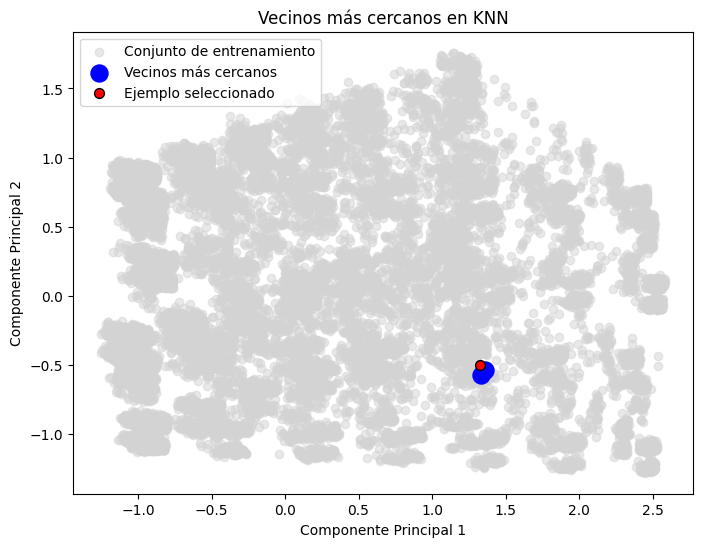

In [ ]:
# Extraer el modelo KNN
knn_model = pipeline.best_models[model_names[3]]

# Seleccionar una muestra del conjunto de validación (X_val como numpy array)
sample_index = 0  # Cambiar este índice para analizar diferentes ejemplos
sample = X_val[sample_index].reshape(1, -1)  # Asegurarse de que tenga forma (1, n_features)

# Obtener los vecinos más cercanos
distances, indices = knn_model.kneighbors(sample)

# Crear un DataFrame con la información de los vecinos (X_train es numpy array)
neighbors_df = pd.DataFrame(
    X_train[indices[0]],  # Recuperar las características de los vecinos
    columns=[f"Feature_{i+1}" for i in range(X_train.shape[1])]  # Crear nombres genéricos para las columnas
)
neighbors_df["Target"] = np.array(y_train)[indices[0]]  # Convertir explícitamente y_train a numpy array
neighbors_df["Distance"] = distances[0]  # Agregar las distancias

# Crear información del ejemplo seleccionado
sample_info = pd.DataFrame(sample, columns=[f"Feature_{i+1}" for i in range(sample.shape[1])])
sample_info["Target"] = np.array(y_val)[sample_index]  # Convertir y_val explícitamente a numpy array
sample_info["Distance"] = 0  # La distancia consigo mismo es 0

# Mostrar información del ejemplo y sus vecinos
print("Ejemplo seleccionado (objetivo):")
print(sample_info)

print("\nVecinos más cercanos:")
print(neighbors_df.sort_values(by="Distance"))

# Visualización (opcional) usando PCA
pca = PCA(n_components=2)

# Reducir dimensiones para graficar
X_train_pca = pca.fit_transform(X_train)  # Reducir X_train a 2D
sample_pca = pca.transform(sample)  # Reducir la muestra a 2D
neighbors_pca = pca.transform(X_train[indices[0]])  # Reducir vecinos a 2D

plt.figure(figsize=(8, 6))

# Graficar todo el conjunto de entrenamiento reducido
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c="lightgray", alpha=0.5, label="Conjunto de entrenamiento")

# Graficar los vecinos más cercanos
plt.scatter(neighbors_pca[:, 0], neighbors_pca[:, 1], c="blue", label="Vecinos más cercanos", s=150)

# Graficar la muestra objetivo
plt.scatter(sample_pca[:, 0], sample_pca[:, 1], c="red", label="Ejemplo seleccionado", s=50, edgecolor="black")  # Reducir el tamaño del punto

plt.title("Vecinos más cercanos en KNN")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.show()


# Random Forest

In [34]:
model_names[4]

'Random Forest'

Predicción: [[0.63839349 0.36160651]]
Bias (valor base): [[0.50067064 0.49932936]]


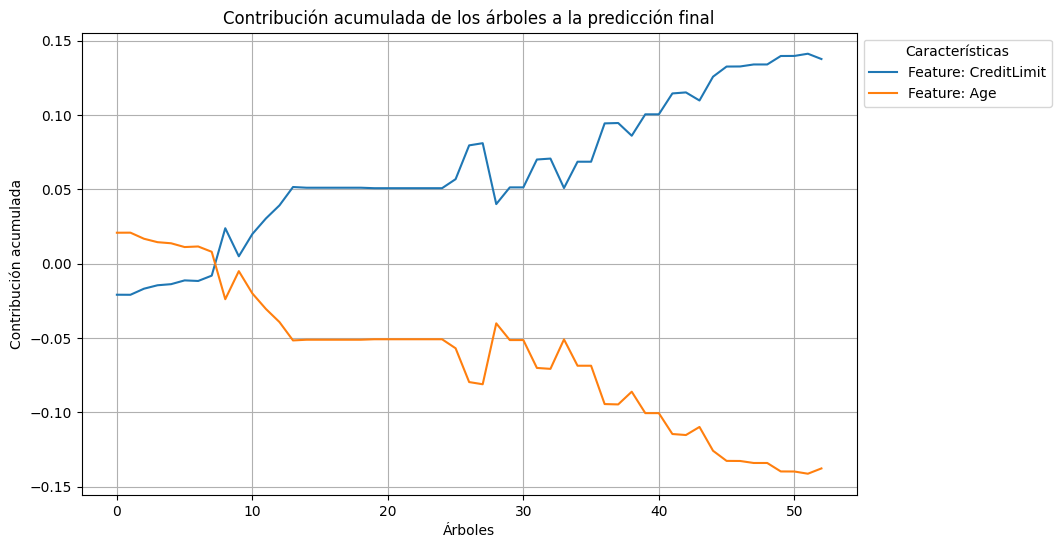

In [ ]:
# Asumimos que ya tienes el mejor modelo de Random Forest entrenado y X_val, y_val
# best_models["Random Forest"] es tu mejor modelo entrenado y X_val es tu conjunto de validación

# Seleccionamos un ejemplo del conjunto de validación (cambia el índice si es necesario)
example_index = 0  # Puedes cambiar el índice para seleccionar un ejemplo diferente
example = X_val[example_index].reshape(1, -1)  # Asegúrate de tomar un ejemplo de tu conjunto de validación

# Explicar la predicción utilizando TreeInterpreter
prediction, bias, contributions = ti.predict(pipeline.best_models[model_names[4]], example)

# Mostrar los resultados
print(f"Predicción: {prediction}")
print(f"Bias (valor base): {bias}")  # El sesgo o bias es el valor de la predicción antes de considerar los árboles

# Contribuciones de cada árbol (en cada árbol individualmente)
tree_contribs = [contrib for contrib in contributions[0]]

# Crear un gráfico de la contribución acumulada de los árboles
cumulative_contrib = np.cumsum(tree_contribs, axis=0)  # Sumar las contribuciones de cada árbol de forma acumulativa

# Crear una figura
plt.figure(figsize=(10, 6))

# Graficar la contribución acumulada de los árboles para cada característica
for i in range(cumulative_contrib.shape[1]):  # Recorrer todas las características
    plt.plot(cumulative_contrib[:, i], label=f'Feature: {feature_names[i]}')

# Etiquetas y título
plt.title("Contribución acumulada de los árboles a la predicción final")
plt.xlabel("Árboles")
plt.ylabel("Contribución acumulada")
plt.legend(title="Características", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Mostrar el gráfico
plt.show()

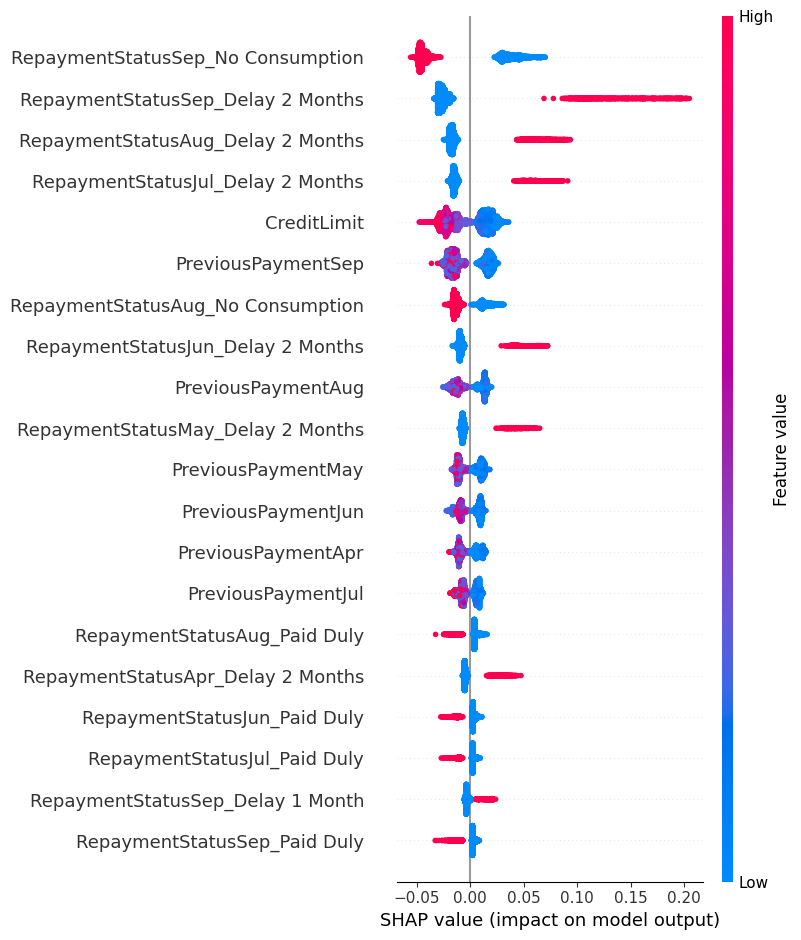

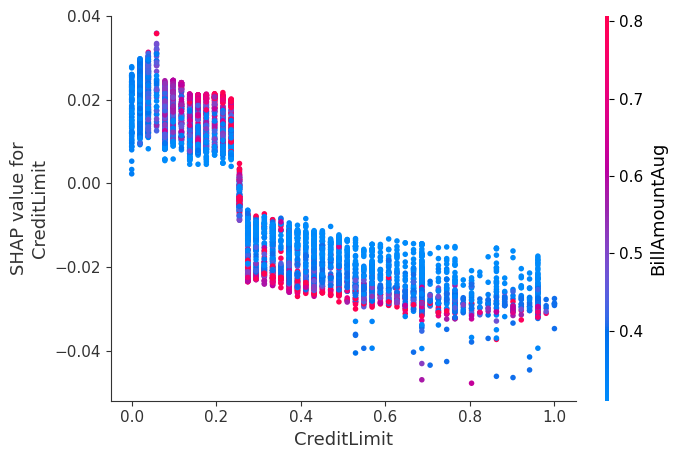

In [ ]:
# Creamos un explicador SHAP para Random Forest
explainer = shap.TreeExplainer(pipeline.best_models[model_names[4]])

# Calculamos los valores SHAP para el conjunto de validación
shap_values = explainer.shap_values(X_val)

shap_values = np.array([[col[1] for col in elem] for elem in shap_values])

# Resumen de los valores SHAP (gráfico resumen)
shap.summary_plot(shap_values, pd.DataFrame(X_val,columns=feature_names))  # 1 es para la clase positiva

# Gráfico de dispersión para un ejemplo específico
shap.initjs()

# Gráfico de dependencia para una característica
shap.dependence_plot("CreditLimit", shap_values, pd.DataFrame(X_val,columns=feature_names), interaction_index=3)

In [37]:
# Seleccionamos un ejemplo (puedes cambiar el índice)
example_index = 0
shap.force_plot(explainer.expected_value[1], shap_values[example_index], X_val[example_index], feature_names=feature_names)


# Gradient Boosting

In [38]:
model_names[5]

'Gradient Boosting'

In [ ]:
boosting_model = pipeline.best_models[model_names[5]]
boosting_model

GradientBoostingClassifier(max_depth=5, random_state=42)

In [40]:
boosting_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

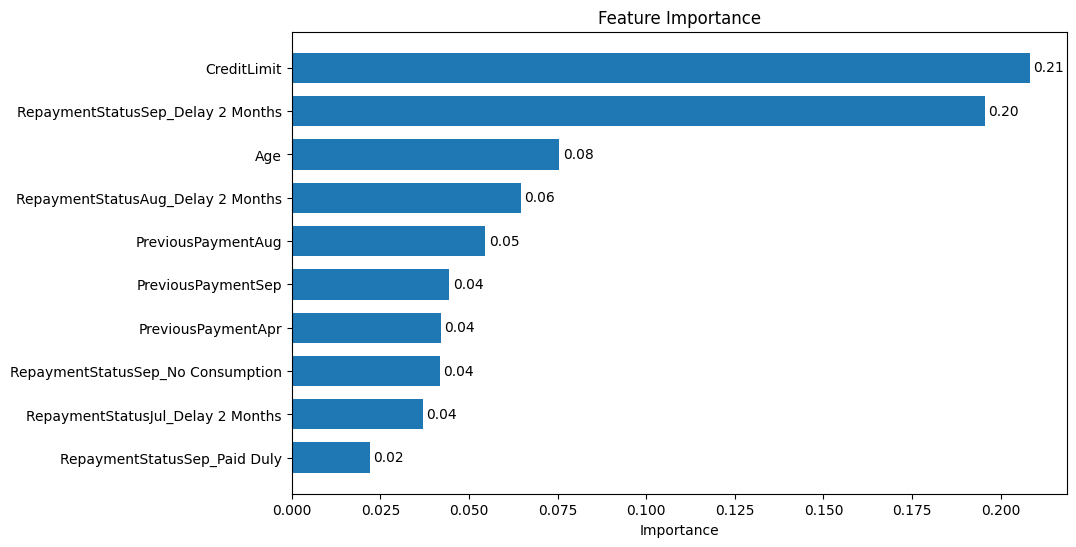

In [41]:
# Obtener importancia de características
feature_importance = boosting_model.feature_importances_  # best_model es tu GradientBoostingClassifier

# Crear un DataFrame para ordenarlas
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

top10 = importance_df.iloc[:10]

# Visualización
plt.figure(figsize=(10, 6))
bars = plt.barh(top10['Feature'], top10['Importance'], height=0.7)
plt.gca().invert_yaxis()  # Invertir eje para mejor visualización
plt.title('Feature Importance')
plt.xlabel('Importance')

# Añadir valores en las barras
for bar, importance in zip(bars, top10['Importance']):
    plt.text(bar.get_width() + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{importance:.2f}', va='center', fontsize=10)

plt.show()


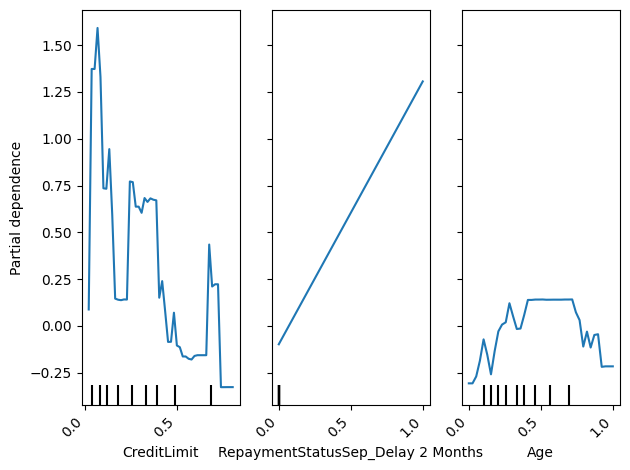

In [42]:
# Generar PDPs para las principales características
X_train_df = pd.DataFrame(X_train, columns=feature_names)
important_features = importance_df['Feature'].head(3)  # Seleccionar las 3 características más importantes
pdp_display = PartialDependenceDisplay.from_estimator(
    boosting_model, X_train_df, features=important_features, grid_resolution=50
)

# Ajustar etiquetas del eje x para evitar solapamiento
for ax in pdp_display.axes_.flatten():  # Iterar sobre los subgráficos
    plt.sca(ax)  # Fijar el subgráfico actual
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas 45° hacia la derecha

plt.tight_layout()  # Ajustar espacios entre los gráficos
plt.show()

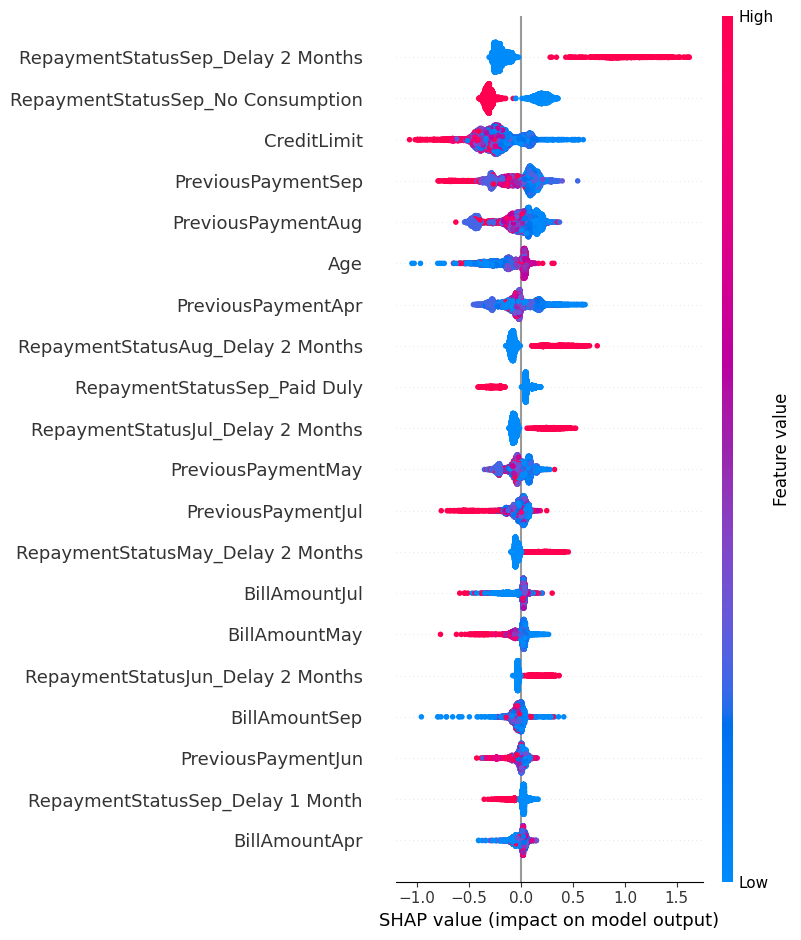

In [43]:
# Usar TreeExplainer directamente
explainer = shap.TreeExplainer(boosting_model)

# Calculamos los valores SHAP para el conjunto de validación
shap_values = explainer.shap_values(X_val)

shap_values = np.array([[col for col in elem] for elem in shap_values])

# Resumen de los valores SHAP (gráfico resumen)
shap.summary_plot(shap_values, pd.DataFrame(X_val,columns=feature_names))

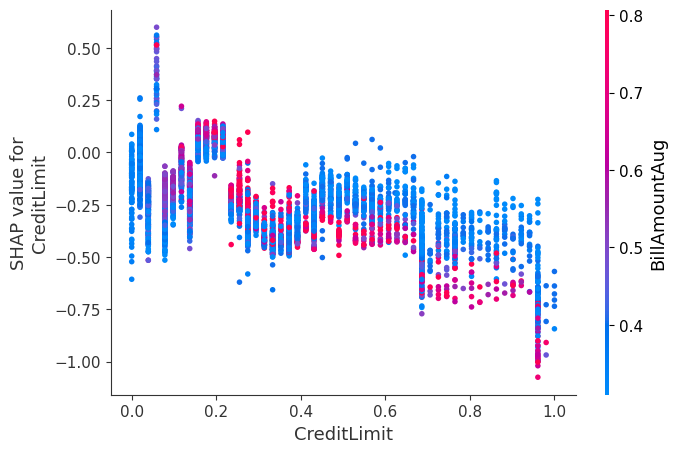

In [44]:
# Gráfico de dispersión para un ejemplo específico
shap.initjs()  # Para inicializar visualizaciones interactivas

# Seleccionamos un ejemplo (puedes cambiar el índice)
example_index = 0
shap.force_plot(explainer.expected_value, shap_values[example_index], X_val[example_index])

# Gráfico de dependencia para una característica
shap.dependence_plot("CreditLimit", shap_values, pd.DataFrame(X_val,columns=feature_names))  # Ajusta el nombre de la característica

In [45]:
# Seleccionamos un ejemplo (puedes cambiar el índice)
example_index = 0
shap.force_plot(explainer.expected_value[0], shap_values[example_index], X_val[example_index], feature_names=feature_names)


# Evaluación de modelos

In [46]:
pipeline.best_models

{'Logistic Regression': LogisticRegression(C=0.1, max_iter=1000, random_state=42, solver='liblinear'),
 'Decision Tree': DecisionTreeClassifier(max_depth=4, min_samples_split=50, random_state=42),
 'Naive Bayes': GaussianNB(var_smoothing=3.1622776601683795e-05),
 'K-Nearest Neighbors': KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance'),
 'Random Forest': RandomForestClassifier(max_depth=5, min_samples_split=50, random_state=42),
 'Gradient Boosting': GradientBoostingClassifier(max_depth=5, random_state=42)}

In [47]:
df_train = pd.DataFrame(X_train, columns=feature_names)
df_val = pd.DataFrame(X_val, columns=feature_names)

In [48]:
metrics_models = {key: None for key in pipeline.best_models}

## Comparativa en Train

In [49]:
pipeline.get_metrics_all_models(df_train, y_train)

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
K-Nearest Neighbors,0.999417,0.999811,0.997551,0.998680,0.999999
Gradient Boosting,0.817792,0.597541,0.540026,0.567330,0.817829
Decision Tree,0.808167,0.583432,0.464306,0.517097,0.734575
Naive Bayes,0.789333,0.523738,0.525711,0.524723,0.754381
Random Forest,0.782667,0.507560,0.588058,0.544852,0.778757
Logistic Regression,0.772875,0.489084,0.599171,0.538559,0.771967


## Comparativa en Test

In [ ]:
pipeline.get_metrics_all_models(df_val, y_val)

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Decision Tree,0.806333,0.578348,0.458930,0.511765,0.724565
Gradient Boosting,0.795833,0.542010,0.495855,0.517906,0.759694
Naive Bayes,0.782167,0.507553,0.506405,0.506978,0.741202
Random Forest,0.780833,0.504016,0.567445,0.533853,0.761117
Logistic Regression,0.769333,0.481859,0.570460,0.522429,0.754355
K-Nearest Neighbors,0.678667,0.352624,0.541824,0.427213,0.665342


## Métricas para cada clase

In [ ]:
pipeline.get_metrics_by_class_all_models(df_val, y_val)

,Accuracy,Precision (0 - No Default),Precision (1 - Default),Recall (0 - No Default),Recall (1 - Default),F1-Score (0 - No Default),F1-Score (1 - Default)
Decision Tree,0.806333,0.854862,0.578348,0.904986,0.45893,0.87921,0.511765
Gradient Boosting,0.795833,0.860217,0.54201,0.881019,0.495855,0.870494,0.517906
Naive Bayes,0.782167,0.859923,0.507553,0.860475,0.506405,0.860199,0.506978
Random Forest,0.780833,0.872614,0.504016,0.841429,0.567445,0.856738,0.533853
Logistic Regression,0.769333,0.871303,0.481859,0.825808,0.57046,0.847946,0.522429
K-Nearest Neighbors,0.678667,0.846503,0.352624,0.717526,0.541824,0.776697,0.427213


In [52]:
pipeline.cm["Decision Tree"]

,0,1
0,4229,444
1,718,609


## Gráficos

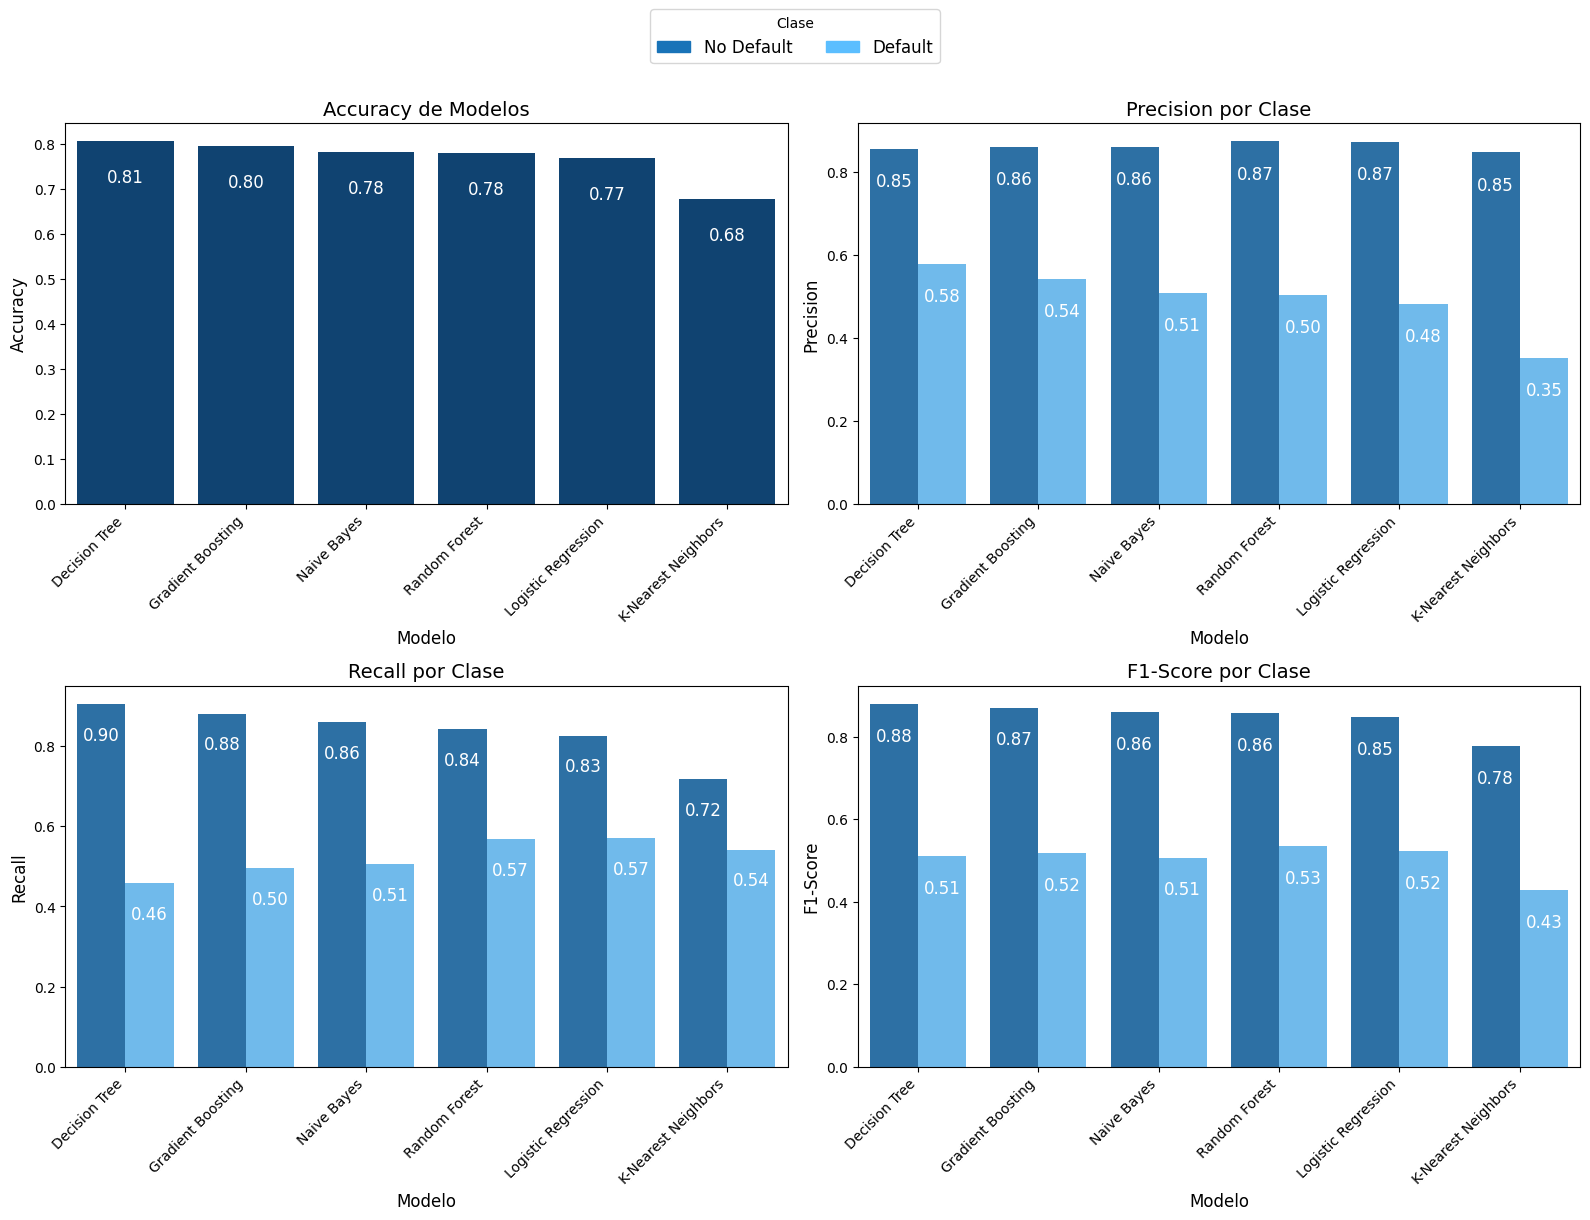

In [ ]:
pipeline.plot_evaluation_metrics()

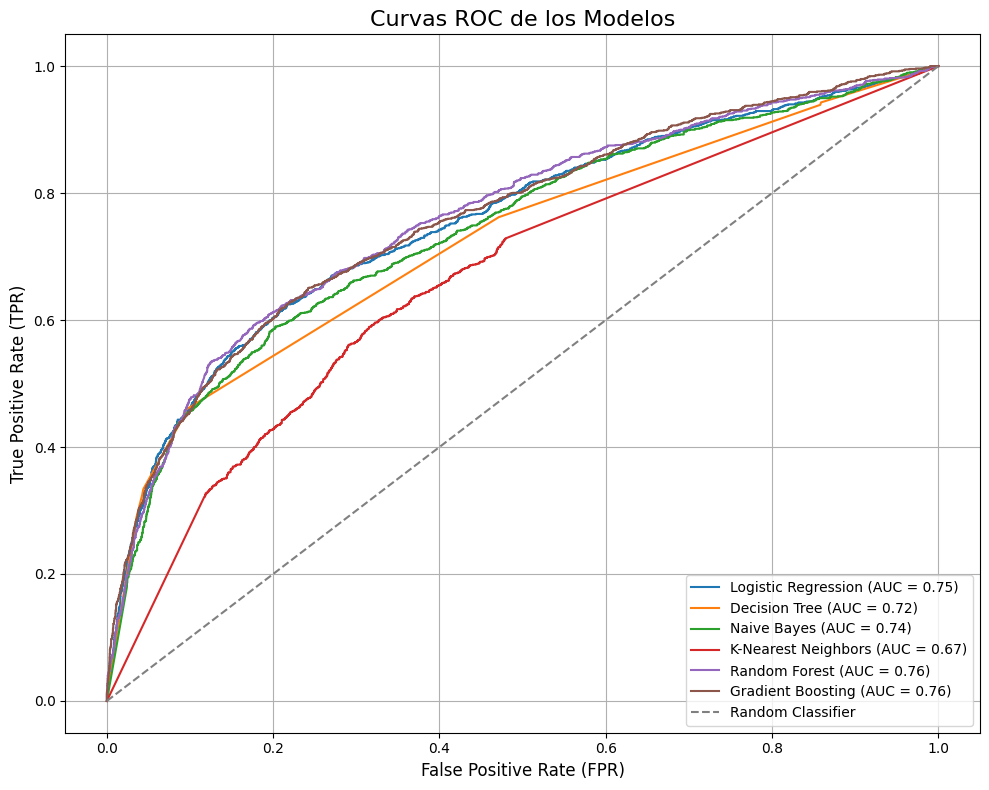

In [54]:
pipeline.plot_roc_curve(df_val, y_val)

## Modelos

### Logistic Regression

In [ ]:
metrics_models["Logistic Regression"] = pipeline.eval_model_test(pipeline.best_models["Logistic Regression"], df_val, y_val)

Matriz de confusión:


,0,1
0,3859,814
1,570,757



Instancias clasificadas correctamente: 4616 
% Instancias clasificadas correctamente = Accuracy: 76.93 %

Instancias clasificadas incorrectamente: 1384 
% Instancias clasificadas incorrectamente = Error Rate: 23.07 %

Métricas de cada clase:


,Precision,Accuracy,Recall (Sensitivity),Specificity,FP Rate,F1-Score,Support
0,0.871303,0.769333,0.825808,0.570460,0.429540,0.847946,4673.0
1,0.481859,0.769333,0.570460,0.825808,0.174192,0.522429,1327.0


Métricas generales:

Accuracy: 0.7693
ROC-AUC: 0.7544


### Decision Tree

In [ ]:
metrics_models["Decision Tree"] = pipeline.eval_model_test(pipeline.best_models["Decision Tree"], df_val, y_val)

Matriz de confusión:


,0,1
0,4229,444
1,718,609



Instancias clasificadas correctamente: 4838 
% Instancias clasificadas correctamente = Accuracy: 80.63 %

Instancias clasificadas incorrectamente: 1162 
% Instancias clasificadas incorrectamente = Error Rate: 19.37 %

Métricas de cada clase:


,Precision,Accuracy,Recall (Sensitivity),Specificity,FP Rate,F1-Score,Support
0,0.854862,0.806333,0.904986,0.458930,0.541070,0.879210,4673.0
1,0.578348,0.806333,0.458930,0.904986,0.095014,0.511765,1327.0


Métricas generales:

Accuracy: 0.8063
ROC-AUC: 0.7246


### Naive Bayes

In [ ]:
metrics_models["Naive Bayes"] = pipeline.eval_model_test(pipeline.best_models["Naive Bayes"], df_val, y_val)

Matriz de confusión:


,0,1
0,4021,652
1,655,672



Instancias clasificadas correctamente: 4693 
% Instancias clasificadas correctamente = Accuracy: 78.22 %

Instancias clasificadas incorrectamente: 1307 
% Instancias clasificadas incorrectamente = Error Rate: 21.78 %

Métricas de cada clase:


,Precision,Accuracy,Recall (Sensitivity),Specificity,FP Rate,F1-Score,Support
0,0.859923,0.782167,0.860475,0.506405,0.493595,0.860199,4673.0
1,0.507553,0.782167,0.506405,0.860475,0.139525,0.506978,1327.0


Métricas generales:

Accuracy: 0.7822
ROC-AUC: 0.7412


### K-Nearest Neighbors

In [58]:
metrics_models["K-Nearest Neighbors"] = pipeline.eval_model_test(pipeline.best_models["K-Nearest Neighbors"], df_val, y_val)

Matriz de confusión:


,0,1
0,3353,1320
1,608,719



Instancias clasificadas correctamente: 4072 
% Instancias clasificadas correctamente = Accuracy: 67.87 %

Instancias clasificadas incorrectamente: 1928 
% Instancias clasificadas incorrectamente = Error Rate: 32.13 %

Métricas de cada clase:


,Precision,Accuracy,Recall (Sensitivity),Specificity,FP Rate,F1-Score,Support
0,0.846503,0.678667,0.717526,0.541824,0.458176,0.776697,4673.0
1,0.352624,0.678667,0.541824,0.717526,0.282474,0.427213,1327.0


Métricas generales:

Accuracy: 0.6787
ROC-AUC: 0.6653


### Random Forest

In [59]:
metrics_models["Random Forest"] = pipeline.eval_model_test(pipeline.best_models["Random Forest"], df_val, y_val)

Matriz de confusión:


,0,1
0,3932,741
1,574,753



Instancias clasificadas correctamente: 4685 
% Instancias clasificadas correctamente = Accuracy: 78.08 %

Instancias clasificadas incorrectamente: 1315 
% Instancias clasificadas incorrectamente = Error Rate: 21.92 %

Métricas de cada clase:


,Precision,Accuracy,Recall (Sensitivity),Specificity,FP Rate,F1-Score,Support
0,0.872614,0.780833,0.841429,0.567445,0.432555,0.856738,4673.0
1,0.504016,0.780833,0.567445,0.841429,0.158571,0.533853,1327.0


Métricas generales:

Accuracy: 0.7808
ROC-AUC: 0.7611


### Gradient Boosting

In [ ]:
metrics_models["Gradient Boosting"] = pipeline.eval_model_test(pipeline.best_models["Gradient Boosting"], df_val, y_val)

Matriz de confusión:


,0,1
0,4117,556
1,669,658



Instancias clasificadas correctamente: 4775 
% Instancias clasificadas correctamente = Accuracy: 79.58 %

Instancias clasificadas incorrectamente: 1225 
% Instancias clasificadas incorrectamente = Error Rate: 20.42 %

Métricas de cada clase:


,Precision,Accuracy,Recall (Sensitivity),Specificity,FP Rate,F1-Score,Support
0,0.860217,0.795833,0.881019,0.495855,0.504145,0.870494,4673.0
1,0.542010,0.795833,0.495855,0.881019,0.118981,0.517906,1327.0


Métricas generales:

Accuracy: 0.7958
ROC-AUC: 0.7597
